<a href="https://colab.research.google.com/github/Bhaanavee/SkillChase/blob/main/Bhaanavee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
df = pd.read_csv("/content/StudentsPerformance.csv")

df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [10]:
# For filtering students by gender
gender_filter = df[df['gender'] == 'female']

gender_filter.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
5,female,group B,associate's degree,standard,none,71,83,78,77.333333
6,female,group B,some college,standard,completed,88,95,92,91.666667


In [4]:
# race/ethnicity and aggregate the scores
agg_scores = df.groupby('race/ethnicity')[['math score', 'reading score', 'writing score']].mean()

agg_scores


,math score,reading score,writing score
race/ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


In [5]:
# Count students based on their parental level of education
parental_education_count = df['parental level of education'].value_counts()

parental_education_count


,count
parental level of education,
some college,226
associate's degree,222
high school,196
some high school,179
bachelor's degree,118
master's degree,59


In [6]:
# Group by lunch type and compare average scores
lunch_comparison = df.groupby('lunch')[['math score', 'reading score', 'writing score']].mean()

lunch_comparison


,math score,reading score,writing score
lunch,,,
free/reduced,58.921127,64.653521,63.022535
standard,70.034109,71.654264,70.823256


In [7]:
# average score for each student
df['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

#top 10% performers
top_10_percent = df.nlargest(int(0.1 * len(df)), 'average_score')

top_10_percent[['gender', 'average_score']]


,gender,average_score
458,female,100.000000
916,male,100.000000
962,female,100.000000
114,female,99.666667
179,female,99.000000
...,...,...
439,male,86.333333
493,female,86.333333
845,male,86.333333
463,female,86.000000


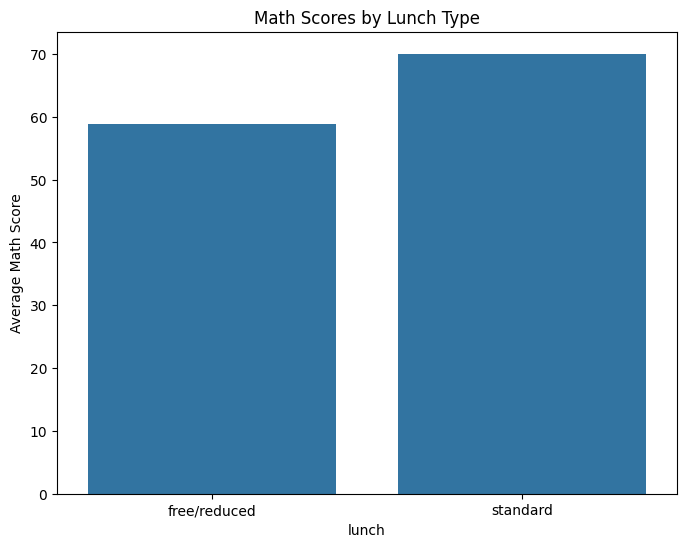

In [8]:
#Adding visualizations
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))

# Barplot for comparison of math scores by lunch type
sns.barplot(x=lunch_comparison.index, y=lunch_comparison['math score'])

plt.title('Math Scores by Lunch Type')
plt.ylabel('Average Math Score')
plt.show()


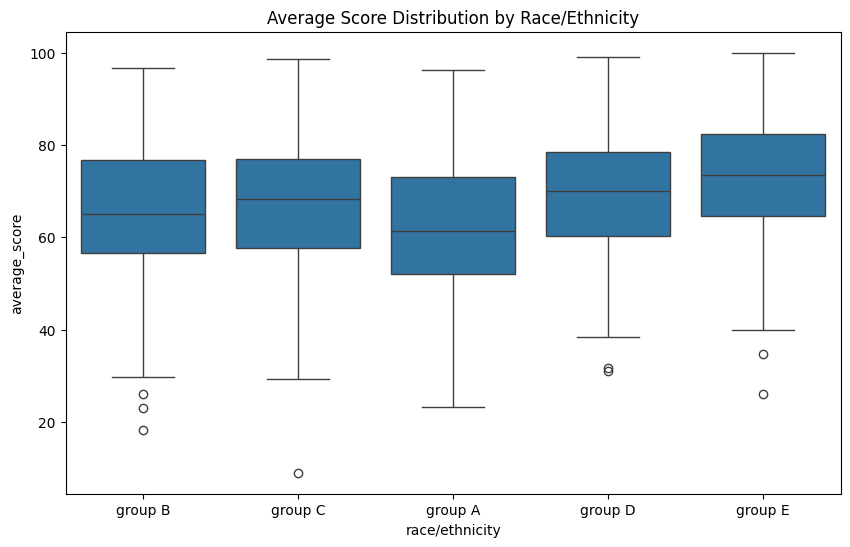

In [9]:
# Boxplot for score distribution by race/ethnicity
plt.figure(figsize=(10, 6))
sns.boxplot(x='race/ethnicity', y='average_score', data=df)
plt.title('Average Score Distribution by Race/Ethnicity')
plt.show()


In [11]:
# Save to a CSV file
df.to_csv('students_performance_analysis.csv', index=False)
from google.colab import files
files.download('students_performance_analysis.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>